## Name: Gadde Manoj
## The Sparks Foundation
## Data Science & Business Analytics intern
## Task1: Predict the percentage of an student based on the no. of study hours.




## Importing all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

## Reading data

In [2]:
student_data=pd.read_csv(r'F:\Intern TSF\student_scores - student_scores.csv')

In [3]:
##looking at rows and columns
student_data.shape

(25, 2)

## First five rows

In [4]:
student_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
## check for null value percentage
round((student_data.isnull().sum())*100/(student_data.shape[0]),2)

Hours     0.0
Scores    0.0
dtype: float64

In [7]:
## looking at mean and std
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Visualizing data

### Pairplot of Data

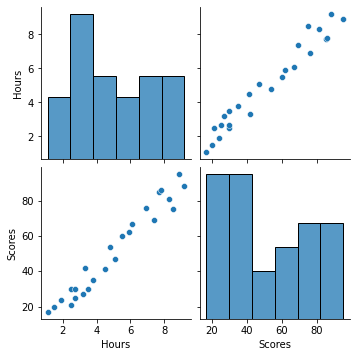

In [8]:
sns.pairplot(student_data)
plt.show()

### Line plot of Hours studied

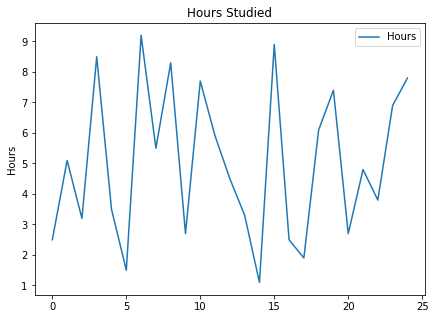

In [9]:
plt.figure(figsize=(7,5))
plt.title('Hours Studied')
plt.ylabel('Hours')
student_data['Hours'].plot()
plt.legend(loc='best')
plt.show(block=False)

- line plot shows that data of hours studied is not stationary

### Line plot of scores

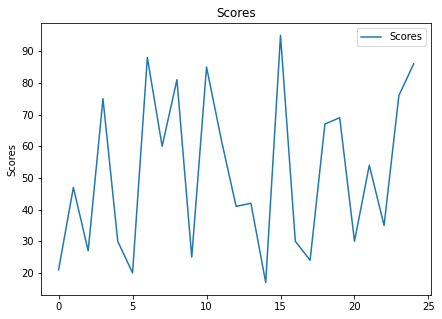

In [10]:
plt.figure(figsize=(7,5))
plt.title('Scores')
plt.ylabel('Scores')
student_data['Scores'].plot()
plt.legend(loc='best')
plt.show(block=False)

- line plot shows that data of scores is not stationary

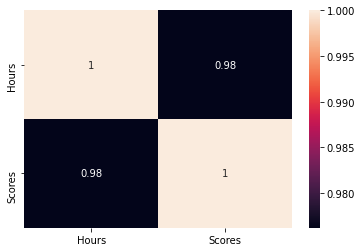

In [11]:
sns.heatmap(student_data.corr(),annot=True)
plt.show()

- looks like hours variable and scores variable is highly correlated

### Scatter plot

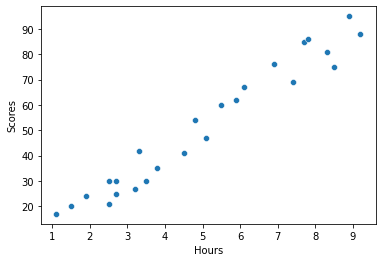

In [12]:
sns.scatterplot(x='Hours',y='Scores',data=student_data)
plt.show()

- as the hours of studying increases,student scores are also increasing

### Boxplot of Scores

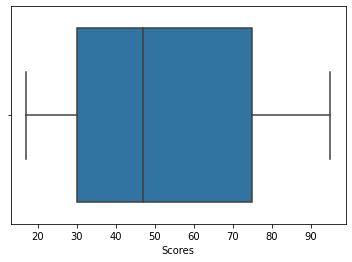

In [13]:
sns.boxplot(student_data['Scores'])
plt.show()

- there are no outliers in scores variable

### boxplot of Hours

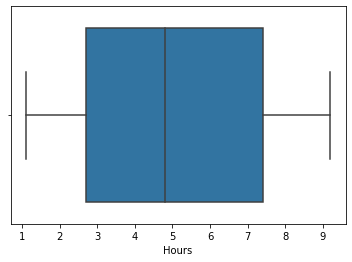

In [14]:
sns.boxplot(student_data['Hours'])
plt.show()

- there are no outliers in Hours variable

### Barplot of Hours and Scores 

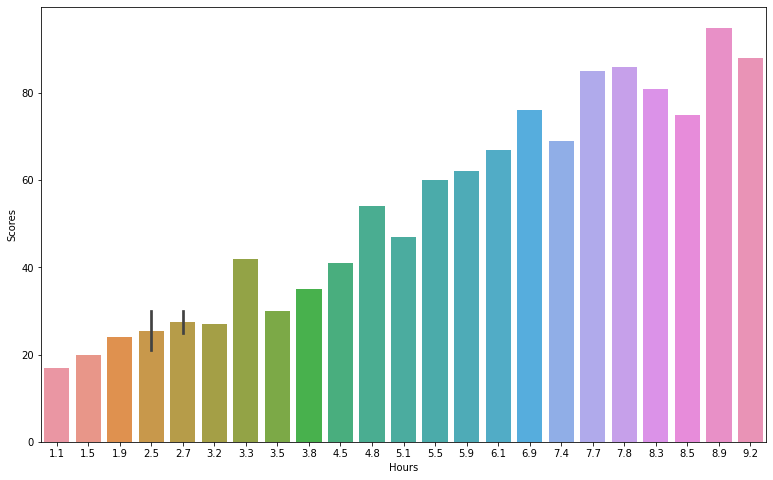

In [15]:
plt.figure(figsize=(13,8))
sns.barplot(student_data['Hours'],student_data['Scores'])
plt.show()

In [16]:
## spliiting into X and y 
X=student_data['Hours']
y=student_data['Scores']


In [17]:
## spliiting into train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [18]:
y_train.shape,X_train.shape,X_test.shape,y_test.shape

((20,), (20,), (5,), (5,))

In [19]:
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)

## Model building using sklearn

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr=LinearRegression()

In [22]:
lr.fit(X_train,y_train)

LinearRegression()

In [23]:
##coefficient and intercept
print(lr.coef_)
print(lr.intercept_)

[9.68207815]
2.826892353899737


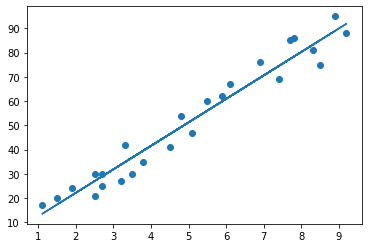

In [24]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [25]:
## making predictions on trian set
y_train_pred=lr.predict(X_train)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

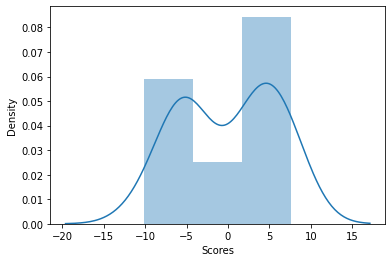

In [26]:
## error rate should be normally distributed--->> linear regression assumption
res=y_train-y_train_pred
sns.distplot(res)

In [27]:
## evaluating
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [28]:
#evaluating on train_set
print('r2_score',r2_score(y_train,y_train_pred))
print('mean_absolute_error',mean_absolute_error(y_train,y_train_pred))
print('root mean squared error',np.sqrt(mean_squared_error(y_train,y_train_pred)))

r2_score 0.9491209376364416
mean_absolute_error 5.221357478352559
root mean squared error 5.608461065868858


In [29]:
##making predictions on test_set
y_test_pred=lr.predict(X_test)

In [30]:
#evaluating on test_set
print('r2_score',r2_score(y_test,y_test_pred))
print('mean_absolute_error',mean_absolute_error(y_test,y_test_pred))
print('root mean square error',np.sqrt(mean_squared_error(y_test,y_test_pred)))

r2_score 0.9678055545167994
mean_absolute_error 3.9207511902099244
root mean square error 4.352380006653288


### predicted score if a student studies for 9.25 hrs/ day?

In [31]:
# You can also test with your own data
hours = 9.25
own_pred = lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.38611528261494


In [32]:
## comparing actual and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})  
df

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


## Model Building using statsmodels

In [33]:
## importing 
import statsmodels.api as sm

In [34]:
## adding constant
X_train_sm=sm.add_constant(X_train)
lr2=sm.OLS(y_train,X_train_sm).fit()

In [35]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     335.8
Date:                Mon, 05 Apr 2021   Prob (F-statistic):           4.34e-13
Time:                        14:50:27   Log-Likelihood:                -62.864
No. Observations:                  20   AIC:                             129.7
Df Residuals:                      18   BIC:                             131.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8269      2.935      0.963      0.348      -3.340       8.994
x1             9.6821      0.528     18.324      0.000       8.572      10.792
==============================================================================
Omnibus:                        7.043   Durbin-Watson:                   1.633
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                1.821
Skew:                          -0.134   Prob(JB):                        0.402
Kurtosis:                       1.546   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

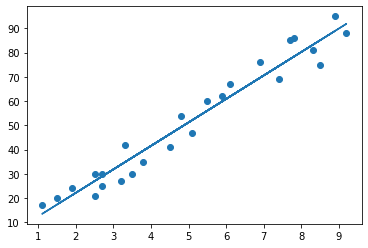

In [36]:
# Plotting the regression line
line = 9.68*X+2.82

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Predictions on test set

In [37]:
##adding constant
X_test_sm=sm.add_constant(X_test)
y_test_pred=lr2.predict(X_test_sm)

In [38]:
##error 
res=y_test-y_test_pred

<AxesSubplot:xlabel='Scores', ylabel='Density'>

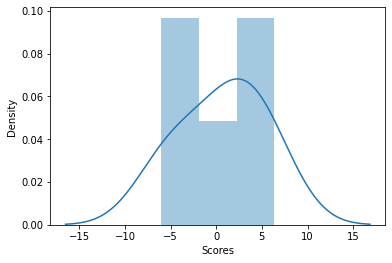

In [39]:
## error rate should be normally distributed--->> linear regression assumption
sns.distplot(res)

In [40]:
## Evaluion using r2_score
from sklearn.metrics import r2_score

In [41]:
##r2_score
r2_score(y_test,y_test_pred)

0.9678055545167993

In [42]:
from sklearn.metrics import mean_squared_error
##rmse value
np.sqrt(mean_squared_error(y_test,y_test_pred))

4.35238000665329